In [46]:
# 📚 Entrenamiento de Red Neuronal CNN para clasificación multiclase

# 🔧 Cargar librerías
import os
import sys
import yaml
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model

In [47]:
# Ajustar path para importar módulos locales
sys.path.append("../src")
import model
import utils
import train

In [48]:
# 🔧 Cargar configuración
with open("../config.yaml", "r") as f:
    config = yaml.safe_load(f)

img_height = config["image"]["height"]
img_width = config["image"]["width"]
batch_size = config["training"]["batch_size"]
epochs = config["training"]["epochs"]
data_path = config["paths"]["prepared_data"]
model_path = config["paths"]["model"]

In [49]:
# 📦 Cargar datos
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    os.path.join(data_path, "train"),
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode="categorical"
)

val_generator = val_datagen.flow_from_directory(
    os.path.join(data_path, "val"),
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode="categorical"
)

Found 1592 images belonging to 54 classes.
Found 355 images belonging to 54 classes.


In [50]:
# ✅ Verificar consistencia de clases
assert train_generator.class_indices == val_generator.class_indices
num_classes = len(train_generator.class_indices)

In [56]:
# 🧠 Construir modelo
cnn_model = model.build_model(config, num_classes)

cnn_model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 62, 62, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 31, 31, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 15376)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │       984,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 54)             │         3,510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 988,086 (3.77 MB)

 Trainable params: 988,086 (3.77 MB)

 Non-trainable params: 0 (0.00 B)

In [52]:
# 🏋️ Entrenar el modelo
callbacks = [
    EarlyStopping(patience=5, restore_best_weights=True),
    ModelCheckpoint(model_path, save_best_only=True)
]

history = cnn_model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=epochs,
    callbacks=callbacks
)

Epoch 1/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 9s 122ms/step - accuracy: 0.0561 - loss: 3.9918 - val_accuracy: 0.0394 - val_loss: 3.8875
Epoch 2/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 104ms/step - accuracy: 0.0927 - loss: 3.5689 - val_accuracy: 0.1070 - val_loss: 3.5865
Epoch 3/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 84ms/step - accuracy: 0.2415 - loss: 2.8680 - val_accuracy: 0.1070 - val_loss: 3.2062
Epoch 4/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 98ms/step - accuracy: 0.4047 - loss: 2.2533 - val_accuracy: 0.1718 - val_loss: 3.0353
Epoch 5/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 91ms/step - accuracy: 0.5800 - loss: 1.6411 - val_accuracy: 0.2056 - val_loss: 2.8532
Epoch 6/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 88ms/step - accuracy: 0.6639 - loss: 1.2853 - val_accuracy: 0.2056 - val_loss: 2.8660
Epoch 7/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 6s 123ms/step - accuracy: 0.7382 - loss: 1.0339 - val_accuracy: 0.2958 - val_loss: 2.7631
Epoch 8/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 88ms/step - accuracy: 0.7770 - loss: 0.8323 - val_accuracy: 0.2930 

In [53]:
# 💾 Guardar modelo
cnn_model.save(model_path)

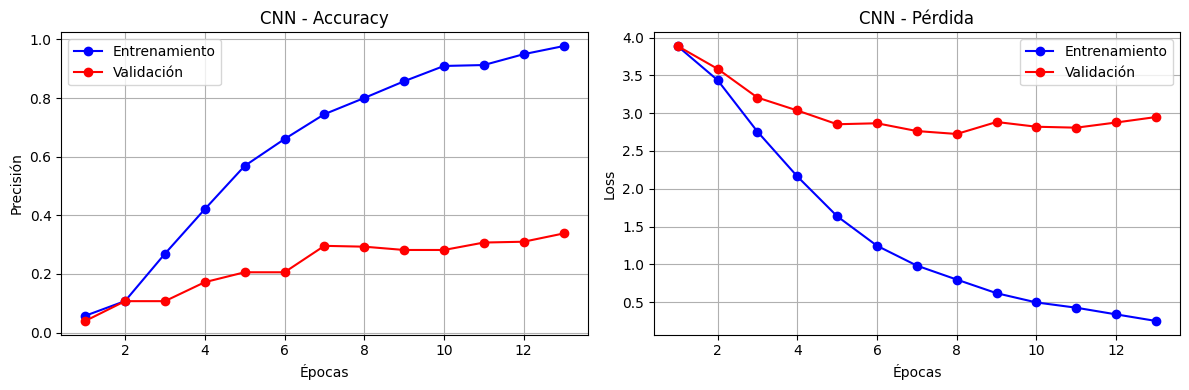

In [54]:
# 📈 Graficar historia de entrenamiento
utils.plot_training_history(history, model_name="CNN")

In [55]:
# ✅ Guardar nombres de clases para uso posterior
with open("class_indices.yaml", "w") as f:
    yaml.dump(train_generator.class_indices, f)